In [48]:
import cmath
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.fftpack import rfft, irfft, fftfreq
from scipy import signal

In [15]:
#create sounds to experiment on
#phasor = amp * np.exp(1j * (2 * np.pi * freq * time + initPhase))  
freq_1 = 1000
freq_2 = 200
nData = 5 * 44100
time = np.arange(0,nData).T/44100
initPhase = numpy.pi / 2
amp = 1
phasor_high = amp * numpy.exp(1j * (2 * numpy.pi * freq_1 * time + initPhase))
phasor_low = amp * numpy.exp(1j * (2 * numpy.pi * freq_2 * time + initPhase))
test_phasor = phasor_high + phasor_low
ipd.Audio(phasor_high.real, rate = 44100)

In [16]:
ipd.Audio(phasor_low.real, rate=44100)

(0, 1000)

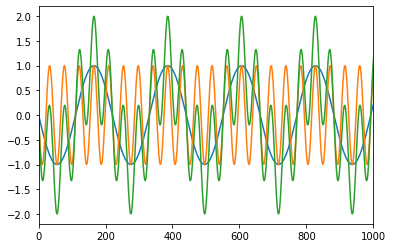

In [17]:
plt.plot(phasor_low.real)
plt.plot(phasor_high.real)
plt.plot(test_phasor.real)
plt.xlim(0, 1000)

In [18]:
ipd.Audio(test_phasor.real, rate = 44100)

In [19]:
def firFreqResp(freqGrid, cutoff):
    filterCoefficients = np.array([1, 0.9])
    nFreqs = np.size(freqGrid)
    firFilterOrder = np.size(filterCoefficients)-1
    # compute the frequency response
    freqResp = filterCoefficients[0]*np.ones(nFreqs)
    for m in np.arange(firFilterOrder)+1:
        freqResp = freqResp + filterCoefficients[m]*np.exp(-1j*m*freqGrid)
    ampResp = numpy.abs(freqResp)
    for index, value in enumerate(ampResp):
        if value > cutoff:
            ampResp[index] = cutoff
        else:
            pass
        
    return ampResp

(0, 1500)

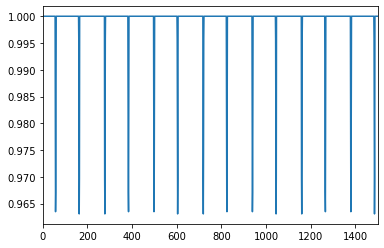

In [20]:
new = firFreqResp(test_phasor, 1)
plt.plot(new)
plt.xlim(0, 1500)

In [21]:
w = np.fft.fft(nData)

IndexError: tuple index out of range

In [43]:
w = numpy.fft.fft(test_phasor.real)
print(len(w))
freqs = numpy.fft.fftfreq(len(w))
print(freqs.max())
print(freqs.min())

220500
0.4999954648526077
-0.5


In [47]:
idx = numpy.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * 44100)
print(freq_in_hertz)

1000.0


In [24]:
a = numpy.fft.ifft(w)

In [25]:
ipd.Audio(a, rate=44100)

C:\Users\frede\anaconda3\lib\site-packages\IPython\lib\display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [35]:
W = fftfreq(nData, d=time[1]-time[0])
print(len(time))
f_signal = rfft(test_phasor.real)
# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W > 900)] = 0

cut_signal = irfft(cut_f_signal)

220500


In [29]:
ipd.Audio(cut_signal, rate=44100)

In [80]:
def highpass(input_, cutoff):
    W = fftfreq(220500, d=time[1]-time[0])
    f_signal = rfft(input_)
    # If our original signal time was in seconds, this is now in Hz    
    cut_f_signal = f_signal.copy()
    cut_f_signal[(W > cutoff)] = 0

    cut_signal = irfft(cut_f_signal)
    print(cut_signal)
    return cut_signal

In [81]:
ipd.Audio(highpass(test_phasor.real, 900), rate=44100)

[ 2.50227039e-13 -2.84913154e-02 -5.69594981e-02 ...  8.53814343e-02
  5.69594981e-02  2.84913154e-02]


In [85]:
#ff = signal.square(test_phasor.real)
ff = test_phasor.real

(0, 1000)

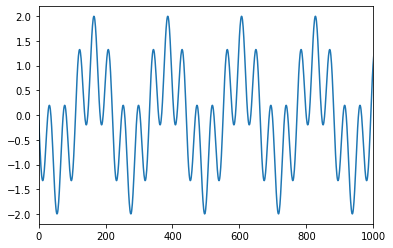

In [86]:
plt.plot(ff)
plt.xlim(0, 1000)

In [87]:
ipd.Audio(ff, rate=44100)

In [88]:
hh = highpass(ff, 800)

[ 2.83780966e-13 -2.84913154e-02 -5.69594981e-02 ...  8.53814343e-02
  5.69594981e-02  2.84913154e-02]


(0, 1000)

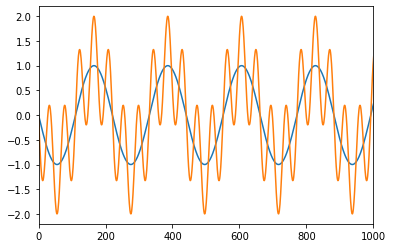

In [89]:
plt.plot(hh)
plt.plot(ff)
plt.xlim(0, 1000)

In [94]:
def ResonatorFilter(inputSignal, nData, samplingFreq):
    nFreqs = 1000
    digFreqGrid = 2 * np.pi * np.arange(nFreqs) / nFreqs
    freqGrid = digFreqGrid * samplingFreq / (2 * np.pi)
    centerFreq = 2 * np.pi * 100 / samplingFreq
    bandwidth = 2 * np.pi * 50 / samplingFreq

    outputSignal = np.zeros(nData)
    nFreqs = np.size(freqGrid)
    poleRadius = (2 - bandwidth) / 2
    poleAngle = np.arccos(2 * poleRadius * np.cos(centerFreq) / (1 + poleRadius ** 2))
    gain = (1 - poleRadius ** 2) * np.sin(poleAngle)
    outputSignal = np.array([gain*inputSignal + 2 * poleRadius * np.cos(poleAngle), -poleRadius ** 2])
    return outputSignal

samplingFreq = 440
simulationTime = 3 #s
nData = np.int(simulationTime*samplingFreq)
nNoiseSamples = 200
inputSignal = np.r_[np.random.randn(nNoiseSamples),np.zeros(nData-nNoiseSamples)] # a short noise burst

# run the algorith
outputSignal, samplingIndices = \
    ResonatorFilter(inputSignal, nData, samplingFreq)

# play back the signal
ipd.Audio(outputSignal, rate=samplingFreq)